# Nepal earthquake project

## Introduction and problem statement

In 2015 an earthquake in Nepal destroyed and damaged a lot of buildings. In the aftermath a vast amount of data was collected on the involved buildings by the Kathmandu Living Labs and the Central Bureau of Statistics which was published as an Open Data Portal dataset. 
http://eq2015.npc.gov.np/#/

A youtube video about the earthquake: https://www.youtube.com/watch?v=WwIw1-voHKQ

**I want to predict damage to buildings in three degrees of severity using this dataset.**

Found as a challenge on this platform: https://www.drivendata.org/competitions/57/nepal-earthquake/page/134/

### Labels: 
Damage degree from 1 (low) - 3 (high) damage

### Features: 
The dataset mainly consists of information on the building structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in the dataset, where the building_id column is a unique and random identifier.


| Feature(s) | Type | Description |
| --- | --- | --- |
| building_id | int | Unique building ID. |
| geo_level_1_id, geo_level_2_id, geo_level_3_id | int | Geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.|
| count_floors_pre_eq | int | Number of floors in the building before the earthquake. |
| age | int | Age of the building in years. |
| area_percentage | int | Normalized area of the building footprint. |
| height_percentage | int | Normalized height of the building footprint. |
| land_surface_condition | categorical | Surface condition of the land where the building was built. Possible values: n, o, t. |
| foundation_type | categorical | Type of foundation used while building. Possible values: h, i, r, u, w. |
| roof_type | categorical | Type of roof used while building. Possible values: n, q, x. |
| ground_floor_type | categorical | Type of the ground floor. Possible values: f, m, v, x, z. |
| other_floor_type | categorical | Type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x. |
| position | categorical| Position of the building. Possible values: j, o, s, t. |
| plan_configuration | categorical | Building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u. |
| has_superstructure_adobe_mud | binary | Flag variable that indicates if the superstructure was made of adobe/mud. |
| has_superstructure_mud_mortar_stone | binary | Flag variable that indicates if the superstructure was made of mud mortar - stone. |
| has_superstructure_stone_flag | binary | Flag variable that indicates if the superstructure was made of stone. |
| has_superstructure_cement_mortar_stone | binary | Flag variable that indicates if the superstructure was made of cement mortar - stone. |
| has_superstructure_mud_mortar_brick | binary | Flag variable that indicates if the superstructure was made of mud mortar - brick. |
| has_superstructure_cement_mortar_brick | binary | Flag variable that indicates if the superstructure was made of cement mortar - brick. |
| has_superstructure_timber | binary | Flag variable that indicates if the superstructure was made of timber. |
| has_superstructure_bamboo | binary | Flag variable that indicates if the superstructure was made of bamboo. |
| has_superstructure_rc_non_engineered | binary | Flag variable that indicates if the superstructure was made of non-engineered reinforced concrete. |
| has_superstructure_rc_engineered | binary | Flag variable that indicates if the superstructure was made of engineered reinforced concrete. |
| has_superstructure_other | binary | Flag variable that indicates if the superstructure was made of any other material. |
| legal_ownership_status | categorical | Legal ownership status of the land where building was built. Possible values: a, r, v, w. |
| count_families | int | Number of families that live in the building. |
| has_secondary_use | binary | Flag variable that indicates if the building was used for any secondary purpose. |
| has_secondary_use_agriculture | binary | Flag variable that indicates if the building was used for agricultural purposes. |
| has_secondary_use_hotel | binary | Flag variable that indicates if the building was used as a hotel. |
| has_secondary_use_rental | binary | Flag variable that indicates if the building was used for rental purposes. |
| has_secondary_use_institution | binary | Flag variable that indicates if the building was used as a location of any institution. |
| has_secondary_use_school | binary | Flag variable that indicates if the building was used as a school. |
| has_secondary_use_industry | binary | Flag variable that indicates if the building was used for industrial purposes. |
| has_secondary_use_health_post | binary | Flag variable that indicates if the building was used as a health post. |
| has_secondary_use_gov_office | binary | Flag variable that indicates if the building was used fas a government office. |
| has_secondary_use_use_police | binary | Flag variable that indicates if the building was used as a police station. |
| has_secondary_use_other | binary | Flag variable that indicates if the building was secondarily used for other purposes. |

### Metric:
The metric used is the micro averaged F1 score, which uses and balances the precision and recall of a classifier. 

$F_{micro} = \frac{2\cdot P_{micro}\cdot R_{micro}}{P_{micro}+R_{micro}}, $

with

$P_{micro} = \frac{\sum_{k=1}^3 TP_k}{\sum_{k=1}^3 (TP_k+FP_k)} $, $R_{micro} = \frac{\sum_{k=1}^3 TP_k}{\sum_{k=1}^3 (TP_k+FN_k)}, $

where $TP$ is the true positive, $FP$ is the false positive, $FN$ is the false negative value and $k$ represents the damage classes 1,2,3.

## General imports and definitions section:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib nbagg

## Load the dataset:

In [2]:
# Load the features and labels into pandas dataframes
df_raw_features = pd.io.parsers.read_csv("train_values.csv",header="infer")
df_labels = pd.io.parsers.read_csv("train_labels.csv",header="infer")

In [3]:
# Print the first five entries
df_raw_features.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# How are the labels distributed? Are there enough samples of every type?
print(np.count_nonzero(df_labels == 1))
print(np.count_nonzero(df_labels == 2))
print(np.count_nonzero(df_labels == 3))

25124
148259
87218


In [5]:
#df_labels.head()

## Data and feature Exploration:

**Are there missing values?**

In [5]:
#print(pd.isnull(df_raw_features).any(1).nonzero()[0])
#print(pd.isnull(df_raw_features).any())

# no missing values found

**Are there non-numeric features?** Yes, we know that from the feature table already but let's check:

In [5]:
# Return columns with non-numeric features (since I checked for empty before all should be captured)
row0 = df_raw_features.loc[0]
categorical_features = row0[pd.to_numeric(row0,errors='coerce').isnull()]
print(categorical_features)

land_surface_condition    t
foundation_type           r
roof_type                 n
ground_floor_type         f
other_floor_type          q
position                  t
plan_configuration        d
legal_ownership_status    v
Name: 0, dtype: object


Use a **one-hot encoding** to work with the categorical values. There is multiple options of encoders to use, in the cell below I use the pandas get_dummies function, further down scikit-learn is being used.

In [6]:
# One-hot encoding using the pandas get_dummies function

# create a copy of the original dataframe for the encoding
df_ohe_features_pd = df_raw_features.copy()

# loop over the categorical features and encode them, put into the new dataframe and drop the old categorical column
for idx,val in categorical_features.items():
    oh_df_raw_features = pd.get_dummies(df_raw_features[[idx]])
    df_ohe_features_pd = pd.concat([df_ohe_features_pd, oh_df_raw_features], axis=1)
    df_ohe_features_pd = df_ohe_features_pd.drop([idx], axis=1)
df_ohe_features_pd.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
# Use sklearn encoders to produce a one-hot encoding (alternative option to the above cell)

# load and initialize the encoders
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder()

# create a copy of the original dataframe for the encoding
df_ohe_features_skl = df_raw_features.copy()

# loop over the categorical features and encode them, put into the new dataframe and drop the old categorical column
for idx,val in categorical_features.items():
    # fit the one-hot encoder
    oh_enc.fit(df_ohe_features_skl[idx].values.reshape(-1,1))
    # transform the column with the fitted one-hot encoder
    transformed = oh_enc.transform(df_ohe_features_skl[idx].values.reshape(-1,1)).toarray()
   
    # create a new data frame from the transformed array and add transformed column names      
    ohe_df = pd.DataFrame(transformed, columns=oh_enc.get_feature_names([idx]))
    #concat with original data and drop original categorical column
    df_ohe_features_skl = pd.concat([df_ohe_features_skl, ohe_df], axis=1).drop([idx], axis=1)

df_ohe_features_skl.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28830,8,900,2812,2,10,8,7,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,94947,21,363,8973,2,10,5,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,590882,22,418,10694,2,10,6,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,201944,11,131,1488,3,30,8,9,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Are there features that can be removed from the dataset?**

In [53]:
# Are there one-hot features I can neglect because they are very uncommon?
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(np.sum(df_ohe_features_pd))

# not really

In [7]:
# lastly, before working with the dataset, drop the random building id 
df_features=df_ohe_features_pd.copy()
df_features=df_features.drop(['building_id'], axis=1)
#df_features.head()

**What are the basic feature stats?**

<IPython.core.display.Javascript object>


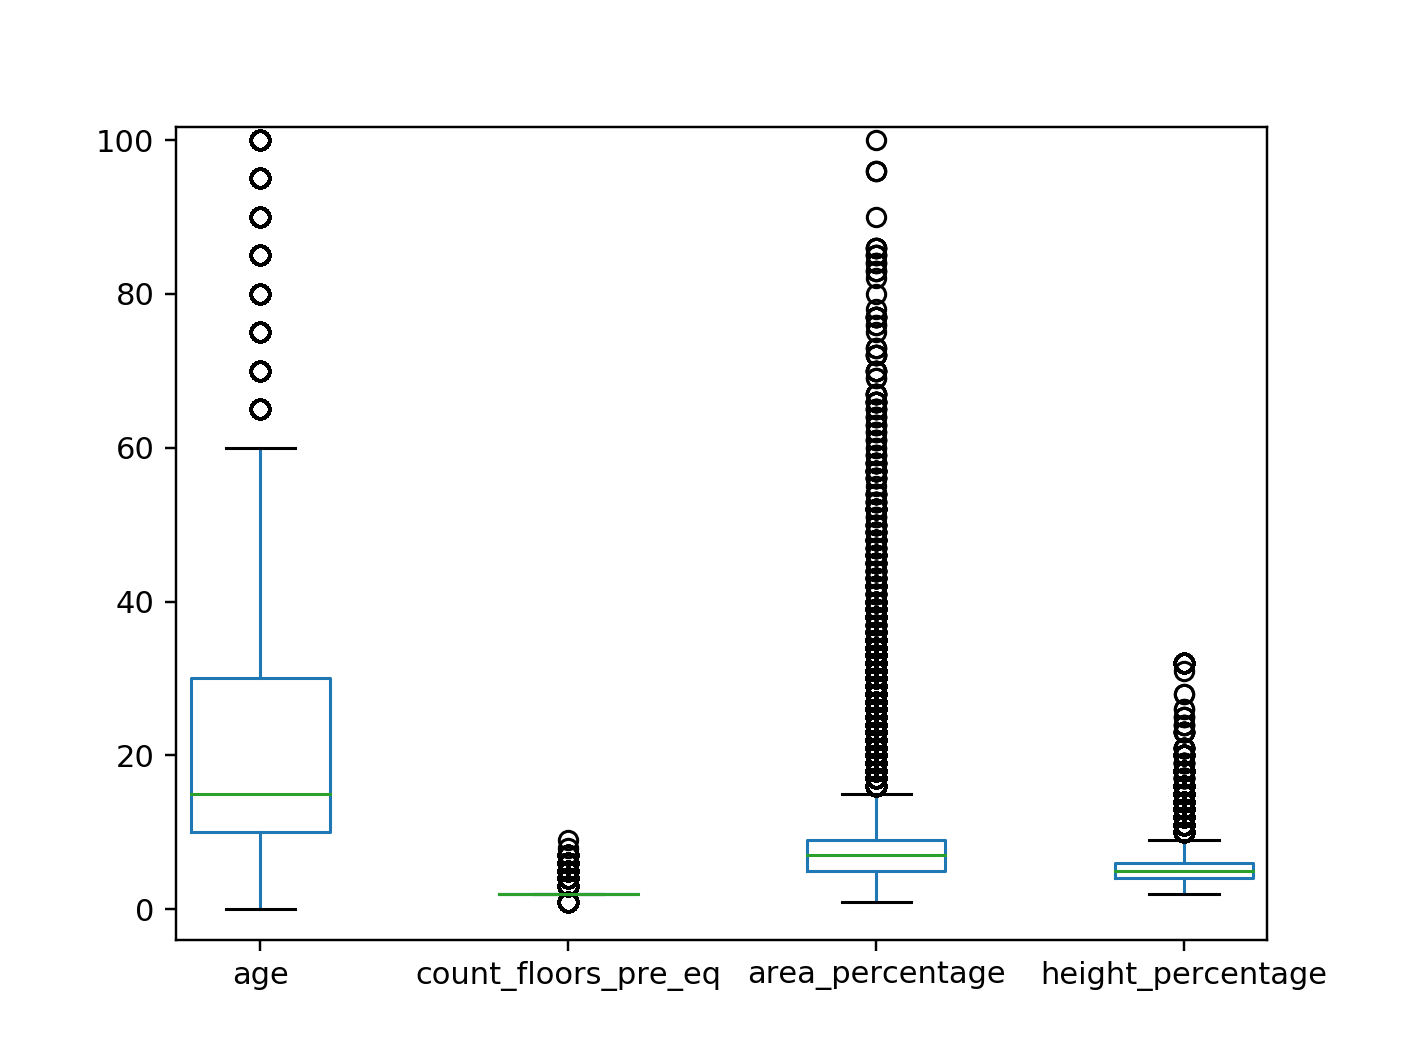

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.000177,0.000146,0.000610,0.021842,0.001328,0.014002,0.021151,0.005652,0.962924,0.010272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.013285,0.012075,0.024693,0.146167,0.036413,0.117500,0.143888,0.074969,0.188948,0.100831
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# Are there a lot of outliers? Think about features that can have outliers
df_features[['age','count_floors_pre_eq','area_percentage','height_percentage']].plot.box()
df_features.describe()

Some features reach high maximum values and / or have some outliers while others are confined to at maximum 1. Since many algorithms perform better when using scaled data, I am going to use a scaling to bring them into similar orders of magnitude.

**Feature scaling**

I use a robust scaler on the integer valued features to remove the influence from the outliers.

In [9]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()

df_features_scaled = df_features.copy()

# the integer valued features to scale
feature_columns=["geo_level_1_id","geo_level_2_id","geo_level_3_id","count_floors_pre_eq",
                 "age","area_percentage","height_percentage","count_families"]


df_features_scaled[feature_columns] = r_scaler.fit_transform(df_features_scaled[feature_columns])
df_features_scaled.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,0.135740,-0.001322,-0.001913,0.129723,0.576751,0.254513,0.217183,0.088645,0.761935,0.034332,...,0.000177,0.000146,0.000610,0.021842,0.001328,0.014002,0.021151,0.005652,0.962924,0.010272
std,0.573830,0.589587,0.575228,0.727665,3.678297,1.098058,0.959209,0.284231,0.425900,0.182081,...,0.013285,0.012075,0.024693,0.146167,0.036413,0.117500,0.143888,0.074969,0.188948,0.100831
min,-0.857143,-1.002857,-0.989115,-1.000000,-0.750000,-1.500000,-1.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.357143,-0.502857,-0.504338,0.000000,-0.250000,-0.500000,-0.500000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.642857,0.497143,0.495662,0.000000,0.750000,0.500000,0.500000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.285714,1.035714,0.993374,7.000000,49.000000,23.250000,13.500000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Are there strongly correlated features in the dataset?** I would expect some since we did a one-hot encoding and e.g. there is a feature for the height of the building and one for the number of floors.

In [35]:
# calculate the feature correlation matrix and plot it
f_corr = df_features_scaled.corr()

<IPython.core.display.Javascript object>


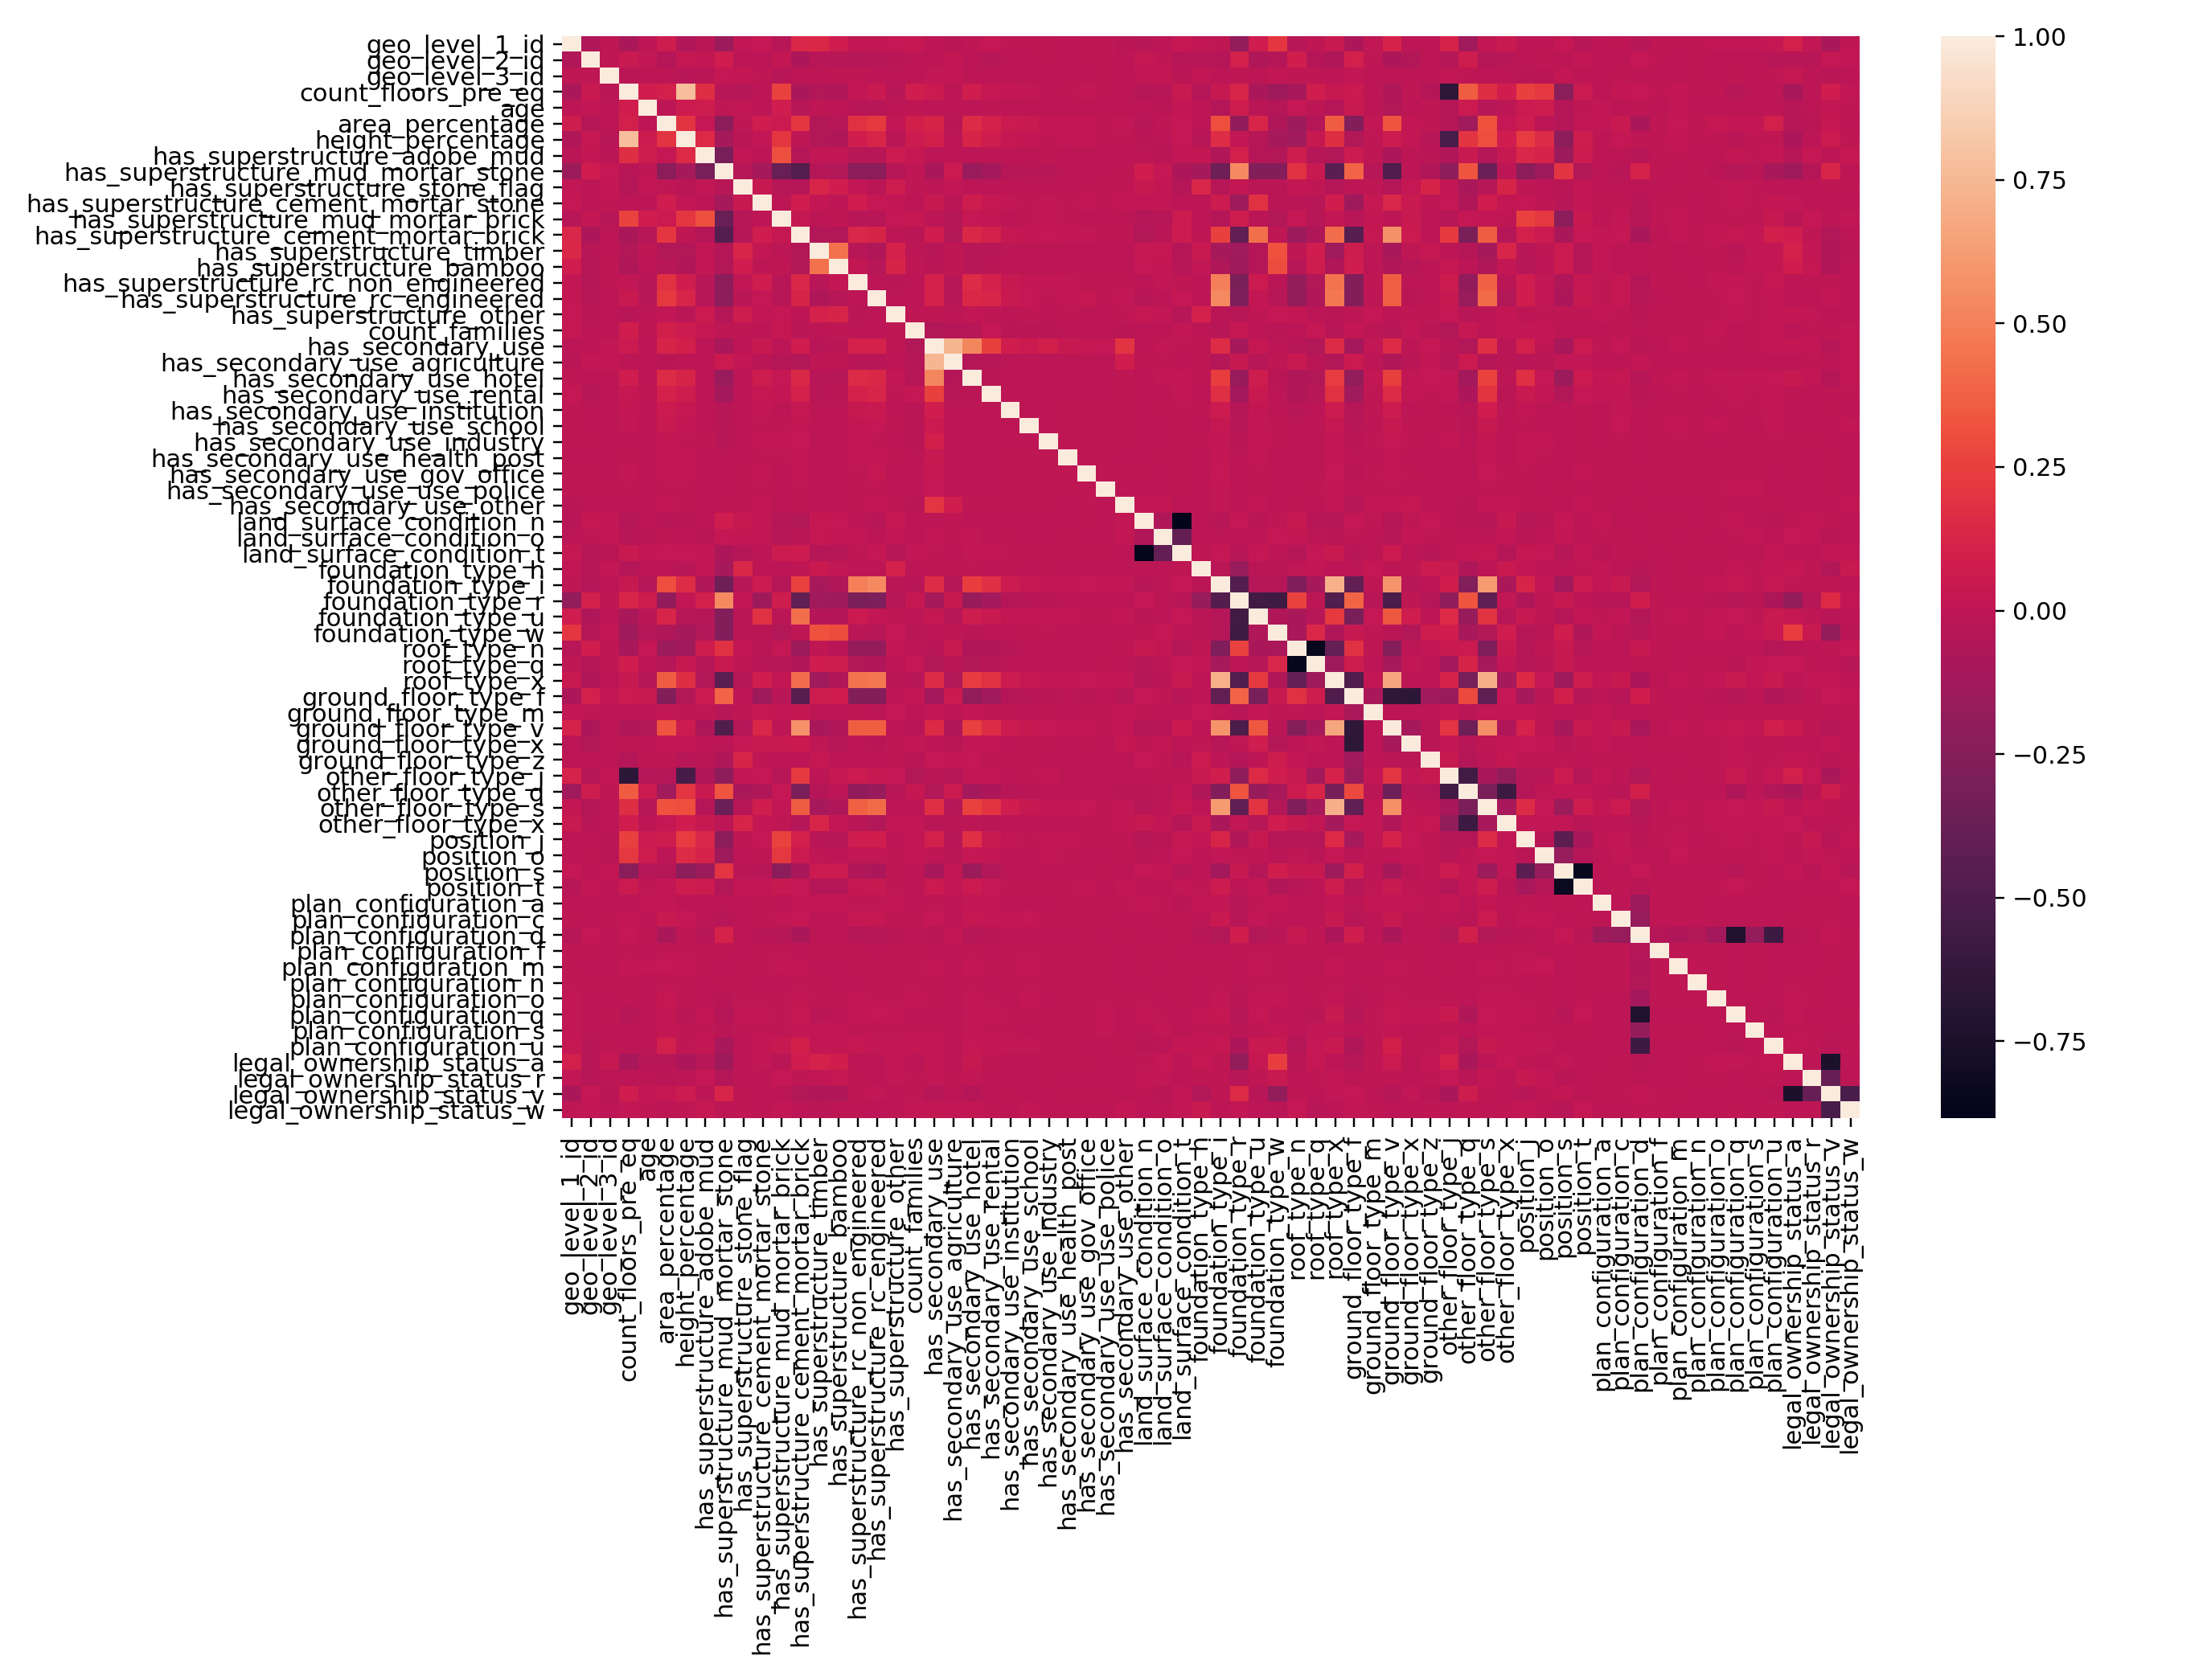

In [50]:
# a plot of the correlation matrix - zoom in for details
plt.figure(figsize=(12.5,9.5))
sns.heatmap(f_corr,xticklabels=f_corr.columns,yticklabels=f_corr.columns)
plt.tight_layout()
plt.show()

There are some highly correlated features visible in the correlation matrix graph. This has to be considered for sensitive models.

## Modelling:

What models and methods are suited to the problem?

- we have a labeled dataset -> supervised learning methods

- we want to split into 3 groups -> classification problem

### Generate Training and Test data

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_features_scaled,df_labels['damage_grade'],test_size=0.2)

# check that the labels are well represented
print(np.count_nonzero(y_train == 1))
print(np.count_nonzero(y_train == 2))
print(np.count_nonzero(y_train == 3))

print(np.count_nonzero(y_test == 1))
print(np.count_nonzero(y_test == 2))
print(np.count_nonzero(y_test == 3))

20046
118616
69818
5078
29643
17400


### Random forest classifier:

I chose a random forest classifier, since they show good performance in classification and allow to gain insight on the importance of individual features for the problem.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')
rf_clf.fit(x_train, y_train)

In [46]:
# determine how well the model predicts using the f1_score
from sklearn.metrics import f1_score
y_pred=rf_clf.predict(x_test)

print(f1_score(y_test, y_pred,average='micro'))
print(f1_score(y_test, y_pred,average=None))

0.7128604593158228
[0.55441756 0.76665558 0.65110214]


In [49]:
# print the 10 most influntial features
feature_importance = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': rf_clf.feature_importances_}).\
                    sort_values('importance', ascending = False)

print(feature_importance[0:10])

                                feature  importance
2                        geo_level_3_id    0.153171
1                        geo_level_2_id    0.135073
0                        geo_level_1_id    0.134252
4                                   age    0.124564
5                       area_percentage    0.111754
6                     height_percentage    0.055099
18                       count_families    0.024718
3                   count_floors_pre_eq    0.016013
35                    foundation_type_r    0.015603
8   has_superstructure_mud_mortar_stone    0.014018


These seem to be features related to position of the building, size and age mostly. Only on 9th and 10th place the foundation and structure start to play a role.

**Parameter grid search**

In [13]:
# optimize the random forest parameters by using a grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_opt_clf = RandomForestClassifier(bootstrap = True, max_features = 'auto')

# the parameters may be varied to find optimal values
parameters = {'min_samples_leaf':[1, 3], 
              'n_estimators':[100, 120]}

clf = GridSearchCV(rf_opt_clf, parameters, scoring='f1_micro', n_jobs=2)

In [14]:
# run on the training data - by deafault it uses 5-fold cross validation
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [17]:
print(clf.best_params_)
predicted = clf.predict(x_test)
print(f1_score(y_test, predicted, average='micro'))

{'min_samples_leaf': 3, 'n_estimators': 120}
0.7180407129563899


This is already a good score as the metric is limited to 1 at maximum. To go further a more elaborate parameter search could be done or the LightGBM library could be used.

### Selected Features:

I want to check how well the random forest performs if using only the 7 most important features? How much information will be lost?

In [38]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(df_features_scaled[['age',
                                                                       'geo_level_3_id',
                                                                       'geo_level_2_id',
                                                                       'geo_level_1_id',
                                                                       'area_percentage',
                                                                       'height_percentage',
                                                                       'count_families']], 
                                                   df_labels['damage_grade'],test_size=0.25)


In [39]:
rf_clf2 = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')
rf_clf2.fit(x_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
from sklearn.metrics import f1_score
y_pred=rf_clf2.predict(x_test2)

print(f1_score(y_test2, y_pred,average='micro'))
print(f1_score(y_test2, y_pred,average=None))

0.6966431827600498
[0.46998578 0.75627949 0.64018178]


The result is very close to the run with all features but much faster to achieve.